#**Multi Layer Perceptron (MLP)**


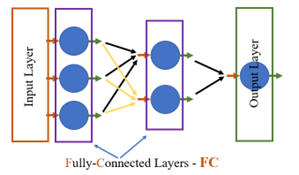

###**How are the weights of Perceptron updated?**

**Every weight Wi is updated by Δ(Wi).**

Wi = Wi + Δ(Wi)

**Where:**

Δ(Wi) = η (y — ŷ) * Xi

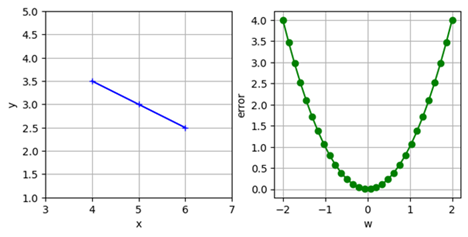

###**How are the weights of MLP updated?**



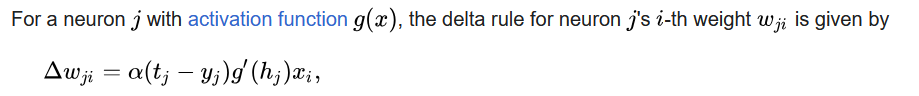

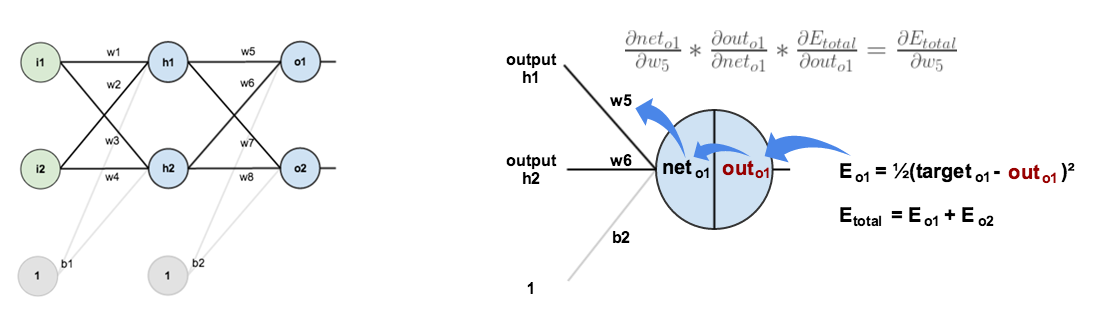

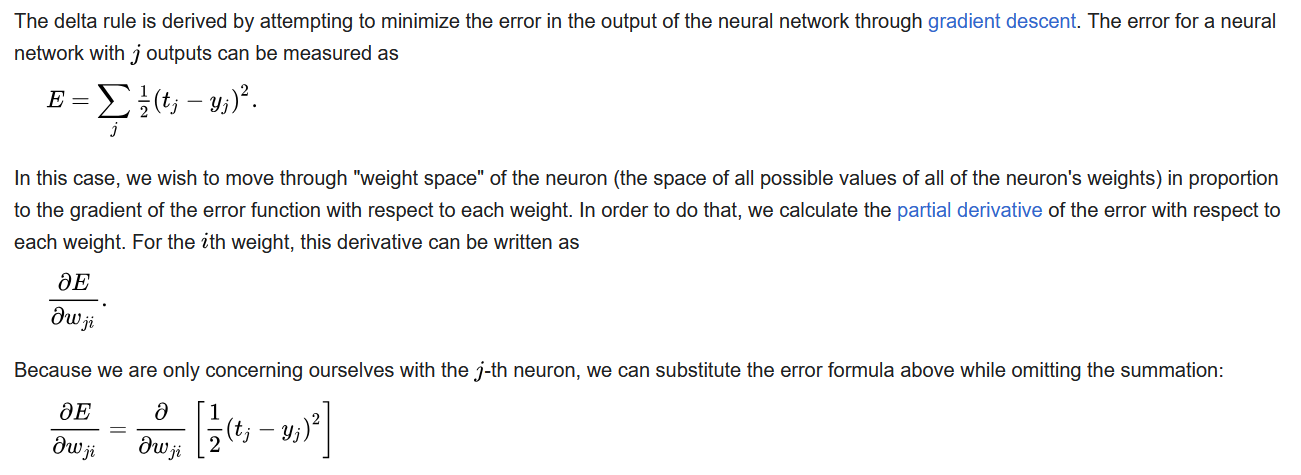

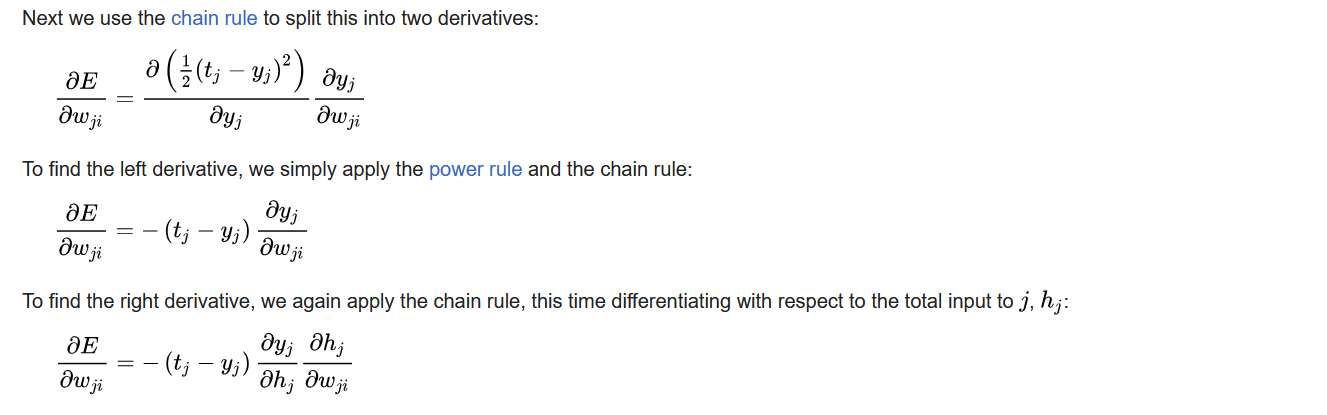

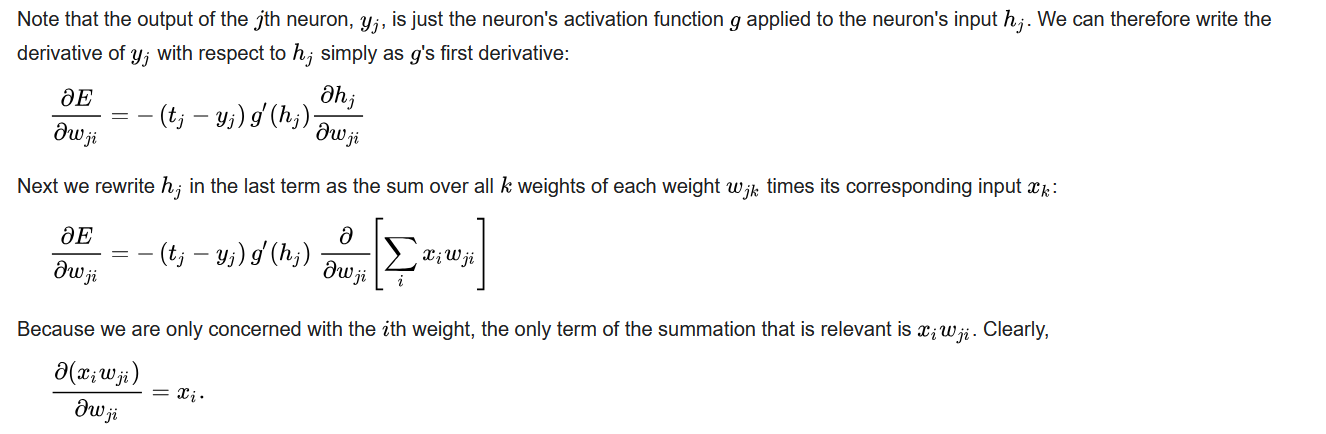

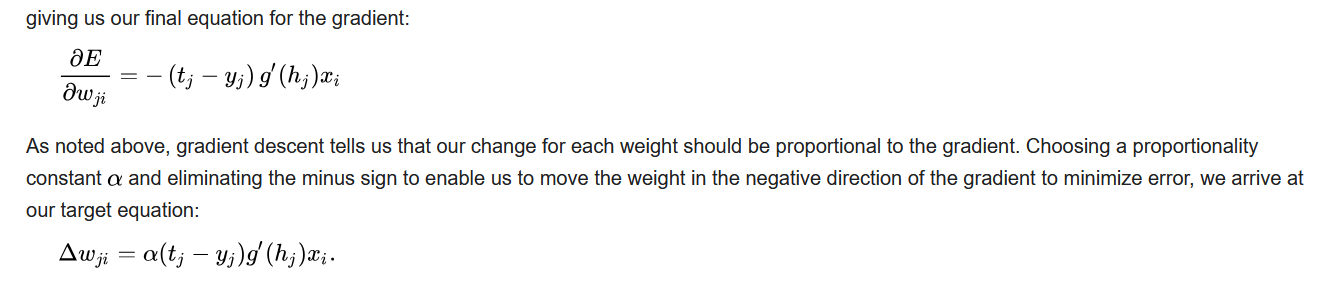

### **Nonlinear Activation Function**

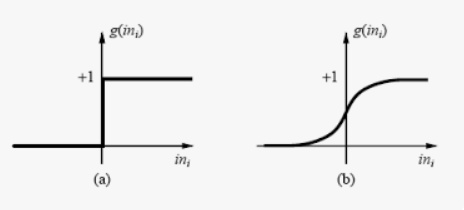

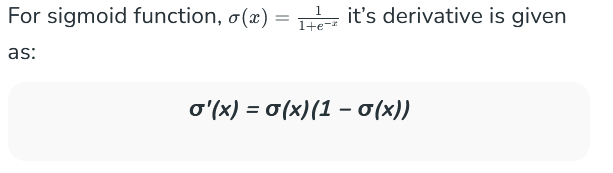

#**Example (Logical Gates AND,OR,XOR):**

###**Generate Data**

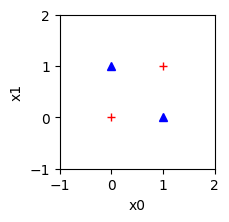

In [ ]:
from matplotlib import pyplot as plt

x_train=[[0,0],
         [0,1],
         [1,0],
         [1,1]]

# y_train=[0,1,1,1]  #OR
# y_train=[0,0,0,1]  #AND
y_train=[0,1,1,0]  #XOR

plt.figure(figsize=(2,2))

for x,y in zip(x_train,y_train):
    if y==0:
        plt.plot(x[0],x[1],color='r',marker='+',label='zero')
    else:
        plt.plot(x[0],x[1],color='b',marker='^',label='one')
plt.xlabel('x0')
plt.ylabel('x1')
plt.axis([-1,2,-1,2])
plt.show()

###**Train and Test Perceptron on XOR gate**

In [ ]:
w0, w1, b = 0., 0., -1

def activate(x):
    return 1 if x >= 0 else 0

def train_perceptron(inputs, desired_outputs, learning_rate, epochs):
    global w0, w1, b
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            A, B = inputs[i]
            target_output = desired_outputs[i]
            output = activate(w0 * A + w1 * B + b)
            error = target_output - output
            w0 += learning_rate * error * A
            w1 += learning_rate * error * B
            b += learning_rate * error
            total_error += abs(error)
        if total_error == 0:
            break


inputs = x_train
desired_outputs = y_train
learning_rate = 0.1
epochs = 100

train_perceptron(inputs, desired_outputs, learning_rate, epochs)

for i in range(len(inputs)):
    A, B = inputs[i]
    output = activate(w0 * A + w1 * B + b)
    print(f"Input: ({A}, {B})  Output: {output}")

print("w0:",w0,"w1:",w1,"b:",b)

Input: (0, 0)  Output: 1
Input: (0, 1)  Output: 1
Input: (1, 0)  Output: 0
Input: (1, 1)  Output: 0
w0: -0.09999999999999998 w1: 2.7755575615628914e-17 b: 0.09999999999999987


###**Train and Test MLP as XOR gate**

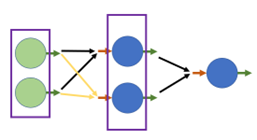

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])


np.random.seed(42)

input_size = 2
hidden_size = 2
output_size = 1
weights_1 = np.random.rand(input_size, hidden_size)
weights_2 = np.random.rand(hidden_size, output_size)


learning_rate = 0.1
epochs = 10000


for epoch in range(epochs):

    hidden_layer_input = np.dot(inputs, weights_1)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_2)
    output = sigmoid(output_layer_input)

    if epoch==0:
        print("inputs_shape:",inputs.shape)
        print("hidden_layer_shape:",hidden_layer_input.shape)
        print("output_layer_shape:",output_layer_input.shape)

    error = outputs - output
    d_output = error * sigmoid_derivative(output)


    hidden_error = d_output.dot(weights_2.T)
    d_hidden = hidden_error * sigmoid_derivative(hidden_layer_output)

    if epoch==0:
        print("output_error_shape:",error.shape)
        print("d_output_shape:",d_output.shape)
        print("hidden_error_shape:",hidden_error.shape)
        print("d_hidden_shape:",d_hidden.shape)

    dw2 = hidden_layer_output.T.dot(d_output) * learning_rate
    weights_2 += dw2
    dw1 = inputs.T.dot(d_hidden) * learning_rate
    weights_1 += dw1

    if epoch==0:
        print("weights_1_shape:",weights_1.shape)
        print("delta_w1_shape:",dw1.shape)
        print("weights_2_shape:",weights_2.shape)
        print("delta_w2_shape:",dw2.shape)

## test model
print("\nresults:")
hidden_layer = sigmoid(np.dot(inputs, weights_1))
predicted_output = sigmoid(np.dot(hidden_layer, weights_2))
for i in range(len(inputs)):
    print(f"Input: {inputs[i]}, Target: {outputs[i]}, Predicted Output: {np.round(predicted_output[i][0])}")

print(" ")
print("weights_1:\n",weights_1)
print("weights_2:\n",weights_2)

inputs_shape: (4, 2)
hidden_layer_shape: (4, 2)
output_layer_shape: (4, 1)
output_error_shape: (4, 1)
d_output_shape: (4, 1)
hidden_error_shape: (4, 2)
d_hidden_shape: (4, 2)
weights_1_shape: (2, 2)
d_w1_shape: (2, 2)
weights_2_shape: (2, 1)
d_w2_shape: (2, 1)

results:
Input: [0 0], Target: [0], Predicted Output: 0.0
Input: [0 1], Target: [1], Predicted Output: 1.0
Input: [1 0], Target: [1], Predicted Output: 1.0
Input: [1 1], Target: [0], Predicted Output: 0.0
 
weights_1:
 [[0.78576227 5.59864481]
 [0.78597603 5.6128331 ]]
weights_2:
 [[-12.09636913]
 [  9.36939838]]


###**Plot MLP decision boundaries**

['r', 'b', 'b', 'r']


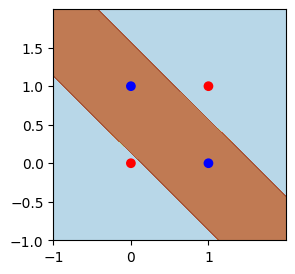

In [ ]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([[0],
              [1],
              [1],
              [0]])


h = .002  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

new_inp = np.c_[xx.ravel(), yy.ravel()]

hidden_layer = sigmoid(np.dot(new_inp, weights_1))
predicted_output = np.round(sigmoid(np.dot(hidden_layer, weights_2)))

Z = predicted_output.reshape(xx.shape)

plt.figure(figsize=(3,3))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
clr = ['r' if c[0]==0 else 'b' for c in Y]
print(clr)
plt.scatter(X[:, 0], X[:, 1], c=clr)


##**MLP and iris dataset**

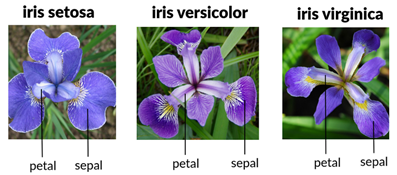

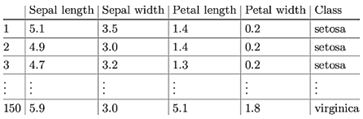

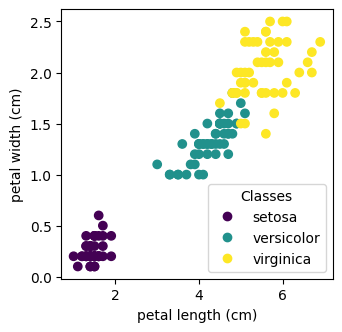

Accuracy: 1.00


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# load iris dataset
iris = datasets.load_iris()

_, ax = plt.subplots(figsize=(3.5,3.5))
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.show()


X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0
y = y.reshape([150,1])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)


class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # initialize weights randomly
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)

        # initialize biases to 0
        self.bias1 = np.zeros((1, self.hidden_size))
        self.bias2 = np.zeros((1, self.output_size))

    def fit(self, X, y, epochs=1000):
        for epoch in range(epochs):
            # feedforward
            layer1 = X.dot(self.weights1) + self.bias1
            activation1 = sigmoid(layer1)
            layer2 = activation1.dot(self.weights2) + self.bias2
            activation2 = sigmoid(layer2)

            # backpropagation
            error = activation2 - y
            d_weights2 = activation1.T.dot(error * sigmoid_derivative(layer2))
            d_bias2 = np.sum(error * sigmoid_derivative(layer2), axis=0, keepdims=True)
            error_hidden = error.dot(self.weights2.T) * sigmoid_derivative(layer1)
            d_weights1 = X.T.dot(error_hidden)
            d_bias1 = np.sum(error_hidden, axis=0, keepdims=True)

            # update weights and biases
            self.weights2 -= self.learning_rate * d_weights2
            self.bias2 -= self.learning_rate * d_bias2
            self.weights1 -= self.learning_rate * d_weights1
            self.bias1 -= self.learning_rate * d_bias1

    def predict(self, X):
        layer1 = X.dot(self.weights1) + self.bias1
        activation1 = sigmoid(layer1)
        layer2 = activation1.dot(self.weights2) + self.bias2
        activation2 = sigmoid(layer2)
        return (activation2 > 0.5).astype(int)

# create an instance of the MLP class
mlp = MLP(input_size=2, hidden_size=4, output_size=1)

# train the MLP on the training data
mlp.fit(X_train, y_train)

# make predictions on the test data
y_pred = mlp.predict(X_test)

# evaluate the accuracy of the MLP
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")


###**MLP on iris data with one-hot label encoding**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1,1)


def one_hot_encode(y):
     maps = {0: [1., 0., 0.], 1: [0., 1., 0.], 2: [0., 0., 1.]}
     new_y = []
     for i in y:
        new_y.append(maps[i[0]])
     return np.array(new_y)


y_onehot = one_hot_encode(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

print("train data:")
for x,y in zip(X_train[:5,:],y_train[:5,:]):
    print("X->",x,"   y->",y)



# create an instance of the MLP class
mlp = MLP(input_size=4, hidden_size=8, output_size=3)

# train the MLP on the training data
mlp.fit(X_train, y_train)

# make predictions on the test data
y_pred = mlp.predict(X_test)

print("\ntest results:")
for x,y,o in zip(X_test[:5,:],y_test[:5,:],y_pred[:5,:]):
    print("X_test->",x,"   y_test->",y,"   y_pred->",o, "   y_pred_argmax->",o.argmax())

# evaluate the accuracy of the MLP
accuracy = np.mean(y_pred.argmax(1) == y_test.argmax(1))
print(f"test accuracy: {accuracy:.2f}")

train data:
X-> [4.6 3.6 1.  0.2]    y-> [1. 0. 0.]
X-> [5.7 4.4 1.5 0.4]    y-> [1. 0. 0.]
X-> [6.7 3.1 4.4 1.4]    y-> [0. 1. 0.]
X-> [4.8 3.4 1.6 0.2]    y-> [1. 0. 0.]
X-> [4.4 3.2 1.3 0.2]    y-> [1. 0. 0.]

test results:
X_test-> [6.1 2.8 4.7 1.2]    y_test-> [0. 1. 0.]    y_pred-> [0 1 0]    y_pred_argmax-> 1
X_test-> [5.7 3.8 1.7 0.3]    y_test-> [1. 0. 0.]    y_pred-> [1 0 0]    y_pred_argmax-> 0
X_test-> [7.7 2.6 6.9 2.3]    y_test-> [0. 0. 1.]    y_pred-> [0 0 1]    y_pred_argmax-> 2
X_test-> [6.  2.9 4.5 1.5]    y_test-> [0. 1. 0.]    y_pred-> [0 1 0]    y_pred_argmax-> 1
X_test-> [6.8 2.8 4.8 1.4]    y_test-> [0. 1. 0.]    y_pred-> [0 1 0]    y_pred_argmax-> 1
test accuracy: 0.87


## **MLP using sklearn**

In [6]:
# Importing required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


# Loading dataset
iris = load_iris()
X, y = iris.data, iris.target


# Splitting data set into train &amp; test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)


# Creating Object
scaler = StandardScaler()
# Standardizing the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Creating (MLP) classifier
clf = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

# Training the model
clf.fit(X_train, y_train)
# Making prediction
y_pred = clf.predict(X_test)

# Determining Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"test accuracy: {accuracy:.2f}")

test accuracy: 0.97
